In [1]:
import sklearn
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset and prepare it

In [2]:
#Load data from Scikit Learn
from sklearn.datasets import load_breast_cancer

In [3]:
#load the data as pandas dataframe
data=load_breast_cancer(as_frame=True)

In [4]:
type(data)

sklearn.utils._bunch.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
X=data.data
Y=data.target

In [7]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
Y # targets

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33)

In [13]:
type(Y_train)

pandas.core.series.Series

In [14]:
N,D=X_train.shape
print("N: ",N)
print("D: ",D)

N:  381
D:  30


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Define the model

In [17]:
model = nn.Sequential(
    nn.Linear(D,1),  #D inputs and 1 outputs
    nn.Sigmoid()
)

In [18]:
criterion=nn.BCELoss()
optimiser=torch.optim.Adam(model.parameters())

In [19]:
Y_train=Y_train.to_numpy()
Y_test=Y_test.to_numpy()

In [20]:
X_train=torch.from_numpy(X_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
Y_train=torch.from_numpy(Y_train.astype(np.float32).reshape(-1,1))
Y_test=torch.from_numpy(Y_test.astype(np.float32).reshape(-1,1))

In [21]:
n_epochs=1000
train_losses=np.zeros(n_epochs)
test_losses=np.zeros(n_epochs)

In [22]:
for it in range(n_epochs):
    optimiser.zero_grad()

    outputs=model(X_train)
    loss=criterion(outputs,Y_train)

    loss.backward()
    optimiser.step()

    outputs_test=model(X_test)
    loss_test=criterion(outputs_test,Y_test)

    train_losses[it]=loss.item()
    test_losses[it]=loss_test.item()

    if (it +1)%50==0:
        print(f"Epochs {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss.item():.4f}")

Epochs 50/1000, Train Loss: 0.4415, Test Loss: 0.4415
Epochs 100/1000, Train Loss: 0.3320, Test Loss: 0.3320
Epochs 150/1000, Train Loss: 0.2716, Test Loss: 0.2716
Epochs 200/1000, Train Loss: 0.2329, Test Loss: 0.2329
Epochs 250/1000, Train Loss: 0.2060, Test Loss: 0.2060
Epochs 300/1000, Train Loss: 0.1862, Test Loss: 0.1862
Epochs 350/1000, Train Loss: 0.1710, Test Loss: 0.1710
Epochs 400/1000, Train Loss: 0.1589, Test Loss: 0.1589
Epochs 450/1000, Train Loss: 0.1491, Test Loss: 0.1491
Epochs 500/1000, Train Loss: 0.1408, Test Loss: 0.1408
Epochs 550/1000, Train Loss: 0.1338, Test Loss: 0.1338
Epochs 600/1000, Train Loss: 0.1278, Test Loss: 0.1278
Epochs 650/1000, Train Loss: 0.1225, Test Loss: 0.1225
Epochs 700/1000, Train Loss: 0.1179, Test Loss: 0.1179
Epochs 750/1000, Train Loss: 0.1137, Test Loss: 0.1137
Epochs 800/1000, Train Loss: 0.1100, Test Loss: 0.1100
Epochs 850/1000, Train Loss: 0.1066, Test Loss: 0.1066
Epochs 900/1000, Train Loss: 0.1036, Test Loss: 0.1036
Epochs 950/

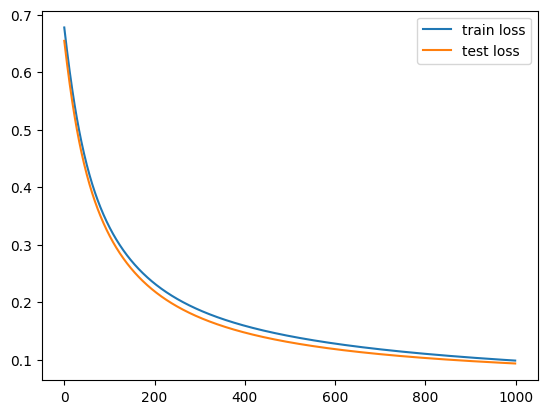

In [23]:
plt.plot(train_losses, label="train loss")
plt.plot(test_losses,label="test loss")
plt.legend()
plt.show()

In [25]:
with torch.no_grad():
    p_train=model(X_train)
    p_train=np.round(p_train.numpy())
    train_acc=np.mean(Y_train.numpy()==p_train)
    train_acc_2=np.sum(Y_train.numpy()==p_train)/len(Y_train)
    
    p_test=model(X_test)
    p_test=np.round(p_test.numpy())
    test_acc=np.mean(Y_test.numpy()==p_test)
print(f"Train acc:{train_acc:.4f},{train_acc_2:.4f} Test acc: {test_acc:.4f}")

Train acc:0.9790,0.9790 Test acc: 0.9787
